In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import numpy as np
import time
import matplotlib.pyplot as plt

# データの読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)


# データ数
m_train, m_test = x_train.shape[0], x_test.shape[0]

batch_size = 128
n_classes = 10
epochs = 100

# ベクトル化
x_train = x_train.reshape(60000,28*28)
print('reshape x_train:', x_train.shape)
x_test = x_test.reshape(-1,28*28)
print('reshape x_test:',x_test.shape)

# 標準化
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# yをOneHotVector化
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
reshape x_train: (60000, 784)
reshape x_test: (10000, 784)


# ディープラーニング（ニューラルネットワーク）
入力層：784ユニット（28×28）  
第1層：768ユニット　ReLU  
第2層：192ユニット　ReLU  
第3層：10ユニット　Softmax　出力層

(60000, 784)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               602880    
_________________________________________________________________
dense_1 (Dense)              (None, 192)               147648    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1930      
Total params: 752,458
Trainable params: 752,458
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.0358 - accuracy: 0.7660 - val_loss: 0.5044 - val_accuracy: 0.8761
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4341 - accuracy: 0.8869 - val_loss: 0.3592 - val_accuracy: 0.9031
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3484

KeyError: ignored

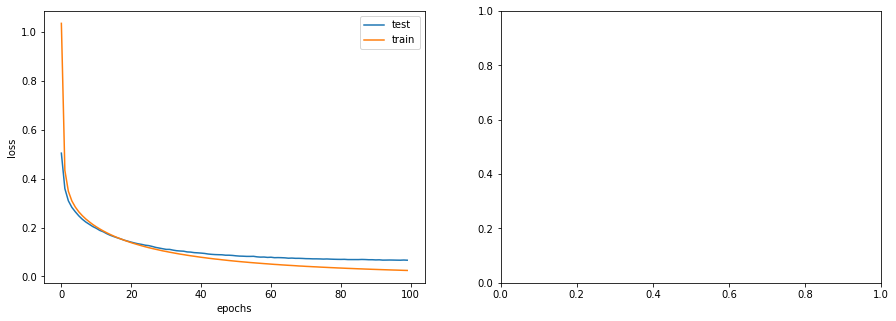

In [2]:
start_time = time.time()

# モデル
print(x_train.shape) #(50000, 3072)
model = Sequential()
model.add(Dense(768, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(192, activation="relu"))
model.add(Dense(10, activation="softmax"))

# コンパイル
model.compile(optimizer='sgd', 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])
# サマリ
model.summary()
# フィット
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size,
                    verbose = 1,
                    epochs=epochs,
                    validation_data=(x_test,y_test)
                    )

print(history.history.keys())

# 経過時間
print("Elapsed[s] : ", time.time() - start_time)

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')


# ディープラーニング　追加検証：層の追加
入力層：784ユニット（28×28）    
第1層：768ユニット　ReLU  
第2層：384ユニット　ReLU  
第3層：192ユニット　ReLU  
第4層：96ユニット　ReLU  
第5層：48ユニット　ReLU  
第6層：10ユニット　Softmax　出力層

In [ ]:
start_time = time.time()
# モデル
print(x_train.shape) #(50000, 3072)
model = Sequential()
model.add(Dense(768, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(384, activation="relu"))
model.add(Dense(192, activation="relu"))
model.add(Dense(96, activation="relu"))
model.add(Dense(48, activation="relu"))
model.add(Dense(10, activation="softmax"))

# コンパイル
model.compile(optimizer='sgd', 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

# サマリ
model.summary()

# フィット
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size,
                    verbose = 1,
                    epochs=epochs,
                    validation_data=(x_test,y_test)
                    )
print(history.history.keys())


# 経過時間
print("Elapsed[s] : ", time.time() - start_time)


fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

# CNN（畳み込みニューラルネットワーク）

入力層：784ユニット（28×28）  
畳み込み層：×10　kernel=3, stride=1 / [30x30x10]  
活性化層　ReLU  
プーリング層　×10　kernel=3, stride=3 / [10x10x10]  
畳み込み層：×20　kernel=3, stride=1 / [8x8x20]  
活性化層　ReLU  
バッチ標準化  
全結合層：1280ユニット  
出力層：10ユニット　SoftMax  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 20)          1820      
_________________________________________________________________
activation_5 (Activation)    (None, 6, 6, 20)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

KeyError: ignored

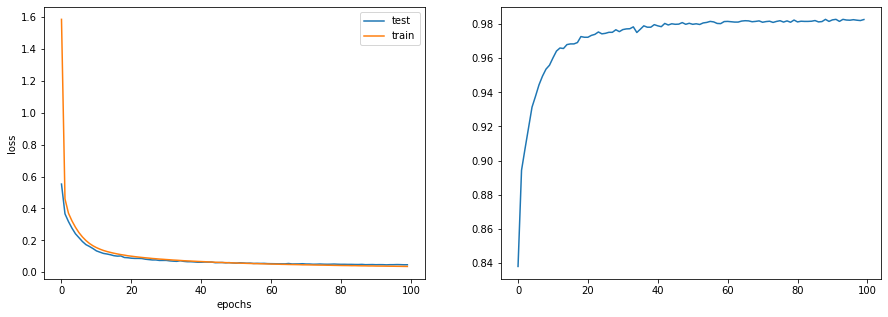

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, BatchNormalization

start_time = time.time()

x_train = x_train.reshape(m_train, 28, 28, 1)
x_test = x_test.reshape(m_test, 28, 28, 1)

# モデル
# CONV -> RELU -> MAXPOOL
model = Sequential()
model.add(Conv2D(10, (3, 3), strides=(1, 1), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPool2D((3, 3)))

# CONV -> RELU -> BN -> Flatten
model.add(Conv2D(20, (3, 3), strides=(1, 1)))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=3))
model.add(Flatten())

# Softmax
model.add(Dense(10, activation="softmax"))

# コンパイル
model.compile(optimizer='sgd', 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

# サマリ
model.summary()

# 経過時間
print("Elapsed[s] : ", time.time() - start_time)

# フィット
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size,
                    verbose = 1,
                    epochs=epochs,
                    validation_data=(x_test,y_test)
                    )
print(history.history.keys())

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')